# Homework 4: Statistics!

*Instructions:*
Please answer the following questions and submit your work
by editing this jupyter notebook and submitting it on Canvas.
Questions may involve math, programming, or neither,
but you should make sure to *explain your work*:
i.e., you should usually have a cell with at least a few sentences
explaining what you are doing.

Also, please be sure to always specify units of any quantities that have units,
and label axes of plots (again, with units when appropriate).

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci
import math
rng = np.random.default_rng()

In [5]:
pd.read_csv("whales.csv")

,Binomial,BodyMass,BodyLen
0,Balaenoptera musculus,154321,30.48
1,Balaenoptera physalus,47506,20.64
2,Delphinapterus leucas,1382,4.25
3,Delphinus delphis,79,2.44
4,Balaena mysticetus,79691,12.19
5,Balaenoptera acutorostrata,5587,5.53
6,Balaenoptera borealis,22106,18.38
7,Balaenoptera edeni,20000,13.85
8,Eschrichtius robustus,27324,11.83
9,Eubalaena australis,23000,14.15


# 1. Mosquito bites

My kid's class all went camping,
and came home with mosquito bites.
Thanks to a post-trip poll,
we know how many mosquito bites
each of the 27 kids had.
Here are the numbers:

In [2]:
coins = rng.choice(['h','t'], size =20)


In [3]:
bites = np.array([4, 5, 4, 2, 4, 8, 4, 6, 7, 5, 4, 0, 5, 7, 5, 3, 2, 0, 3, 4, 5, 3, 6, 1, 2, 3, 5])

Use maximum likelihood to fit a Poisson distribution to these data.
To do this, you should

*(a)* make a plot of the Poisson likelihood as a function of $\lambda$, the mean of the Poisson, and

*(b)* use an optimization function (like `scipy.optimize.minimize()`)
to find the value of $\lambda$ that maximizes the log-likelihood.
    *(note: the `minimize` function works better if you use the log likelihood instead of the likelihood!)*

*(c)* check your answer is sensible by comparing the distribution of the data to that expected under
    the model you've fit.

*(d)* Under this model, what proportion of kids do we expect to have zero mosquito bites?
    Answer this question with math, and check it with simulation.

**Response to Part A**
So what I did to make a plot of the Poisosn likelihood as a function of lambda is to graph the likelihoods as a function of lambda. I made a function called poisson_pmf_bites that takes a potential lambda value, and returns the probability mass function of that lambda. Now finally we need to make it actually make sense by normalizing our data. Our goal should be a graph that returns the chance of that particular lambda being the value, which we can find by dividing our probabiltiy mass results by the area under our curve (calculated with np.trapz (something that is basically and integration function)).  This way we if plot the normalized likelihood of the lambda values with the lambda values, we will get this plot that we want. 

**Code to part A**

Text(0.5, 1.0, 'Log Likelihood vs Lambda Values')

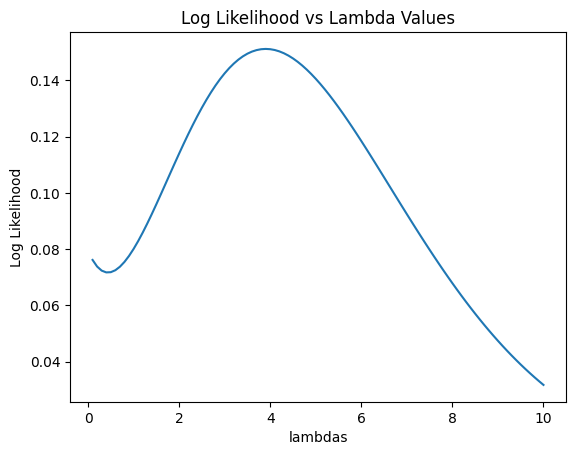

In [4]:
from scipy.stats import poisson
def poisson_pmf_bites(potential_lambda):
    logpmfs = poisson.pmf(bites, potential_lambda)
    return np.sum(logpmfs)

lambda_vals = np.linspace(0.1,10,100)
likelihoods = np.array([poisson_pmf_bites(val) for val in lambda_vals])

area = np.trapz(likelihoods,lambda_vals)
normalzied_like = likelihoods/area

plt.plot(lambda_vals, normalzied_like)
plt.xlabel("lambdas")
plt.ylabel("Log Likelihood")
plt.title("Log Likelihood vs Lambda Values")

**Code for Part B**

In [8]:
def log_poisson(potential_lambda):
    logpmfs = poisson.logpmf(bites, potential_lambda)
    return np.sum(logpmfs)

from scipy.optimize import minimize
mean_bites = np.mean(bites)
initial_guess = mean_bites
max_pois_like = minimize(lambda x: -log_poisson(x), initial_guess)
max_lambda = max_pois_like['x'][0] #minimize function returns a dictionary where 'x' represents the lambda value that is the maximized likelihood
max_lambda

3.962962962962963

**Explanation for Part C**

Were going to plot both our simulated data and the given data (seen below). I would say that the poisson distribution matches it shockingly well. Now granted the simulation was only with 100 draws, but the observed data is also small. I would say it's reasonable to use the poisson distribution, and the our lambda value of 3.962 seems reasonable. 

**Code For Part C**

Text(0.5, 1.0, 'observed_data')

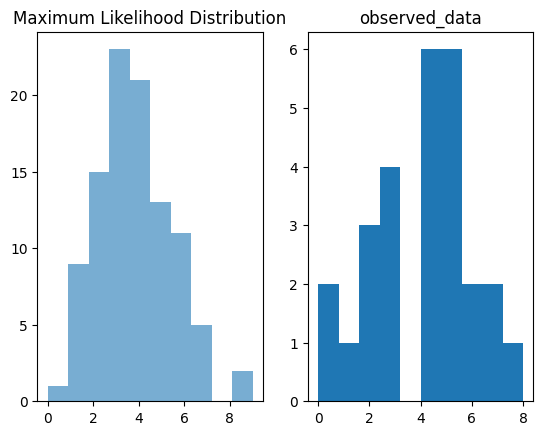

In [9]:
plt.subplot(1,2,1)
maxL_dis = rng.poisson(max_lambda, size = 100)

plt.hist(maxL_dis,alpha =.6)
plt.title("Maximum Likelihood Distribution")

plt.subplot(1,2,2)
plt.hist(bites)
plt.title("observed_data")

**Explanation for Part D**
For part D we want to find the proportion of kids that would have 0 bites in our poisson distribution. We can do this simply by simulation by drawing from our maximum likelihood poisson distribution, counting the amount of 0's and then dividing by whatever our size is. When doing it through this method we should pick a very large number of n. (See simulation code below). After simulating with 1 million draws a couple times, I would expect about 1.9% of kids to have no mosquito bites. 

Doing this with math we're going to use the probabiltiy mass function for lambda and evaluate it at k = 0. Said function is seen here: $$\begin{aligned}
    \P\{ X = k \}
    &\approx
    \frac{1}{k!} \lambda^k e^{-\lambda} ,
\end{aligned}$$
The math using this function is below, with lambda being our maximized value we found earlier, and k = 0. After evaluation, we find that the expected chance for a kid to have no mosquito bites is 1.9%

Great to see that our proportions are equivalent to eachother

**Code for part D**

In [10]:
#Simulation code
n = 1000000
big_sim = rng.poisson(max_lambda, size = n)
number_of_0 = sum(big_sim==0)
proportion = number_of_0/n
proportion

#math cade
math_proportion = ((max_lambda**0) * (math.e **-max_lambda))/math.factorial(0)  #we could notice that max_lamda raised to 0 is 0, and math.factorial(0) is one
math_proportion                                                                 #but this makes it clear what were doing

0.0190067145863875

# 2. Modeling proportions

The [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution)
can be used to model *proportions:*
it gives random numbers between 0 and 1,
and has two parameters: $\alpha$ and $\beta$.
If $X \sim \text{Beta}(\alpha, \beta)$ then
$$ \begin{aligned}
    \mathbb{E}[X] &= \frac{\alpha}{\alpha + \beta} \\
    \mathbb{E}[X^2] &= \frac{\alpha (\alpha-1)}{(\alpha + \beta)(\alpha + \beta - 1)} ,
\end{aligned}$$
and
$X$ has probability density
$$ f_X(u) =
\frac{ u^{\alpha - 1}(1 - u)^{\beta - 1} }{ B(\alpha, \beta) }.
$$
This density can be computed (as usual) with `scipy.stats.beta.pdf`,
or by hand; in the latter case, $B(\alpha, \beta)$ can be computed with `scipy.special.beta`.

Suppose we have data from many different tracts of forest
of what proportion of the trees have burned,
and we'd like to fit a Beta distribution to the data.
These proportions are:

In [11]:
burned = np.array([
    0.04, 0.55, 0.91, 0.64, 0.83, 0.62, 0.98, 0.7, 0.36, 0.73, 0.74, 0.28, 0.35, 0.65, 0.85, 0.9, 0.94,
    0.11, 0.74, 0.48, 0.62, 0.66, 0.51, 0.79, 0.61, 0.66, 0.75, 0.86, 0.52, 0.84, 0.43, 0.61, 0.99, 0.85, 
    0.97, 0.46, 0.75, 0.61, 0.95, 0.76, 0.78, 0.89, 0.79, 0.92, 0.83, 0.84, 0.61, 0.52, 0.82, 0.87, 0.9, 
    0.58, 0.67, 0.42, 0.9, 0.4, 0.95, 0.98, 0.56, 0.94, 0.5, 0.84, 0.58, 0.91, 0.21, 0.54, 0.9, 0.64, 0.48,
    0.82, 0.77, 0.63, 0.84, 0.97, 0.77, 0.96, 0.83, 0.9, 0.96, 0.52, 0.24, 0.92, 0.11, 0.96, 0.85, 0.62, 
    0.96, 0.67, 0.87, 0.78, 0.85, 0.88, 0.88, 0.68, 0.13, 0.9, 0.94, 0.49, 0.74, 0.99
])

*(a)* Make a plot of the likelihood surface for this data
    over the range $0.5 \le \alpha, \beta \le 4$.

*(b)* Estimate the values of $\alpha$ and $\beta$ that best fit the data
    by maximum likelihood.
    
*(c)* Using this model, in what proportion of forest tracts
    do you estimate less than 20% of the trees have burned?

**Response to Part A and B**

To make a plot of the likelihood surface for this data over the range I'm pulling code straight from the lab. We're going to make a contour graph, of simulated logpdfs values. We're also going to pull the code from the lab to get the maximum likelihood value of alpha and beta. In the contour graph were going to put a star where the maximum likelihood estimates are. P.S After doing some math (in the code below), the maximum likelihood values for alpha is 2.28 and beta = .99

**Code for Part A and B**

In [12]:
from scipy.stats import beta

def beta_log(alpha, beta_data):
        lpdfs = beta.logpdf(burned, a=alpha, b=beta_data)
        return np.sum(lpdfs)
    
def beta_mle(): #code taken from the slides and from lab
    def logL(alpha, beta_data):
        lpdfs = beta.logpdf(burned, a=alpha, b=beta_data)
        return np.sum(lpdfs)
    
    max_L = minimize(lambda x: -logL(*x), x0=(5,1))
    mle_alpha, mle_beta = max_L['x']
    return mle_alpha, mle_beta

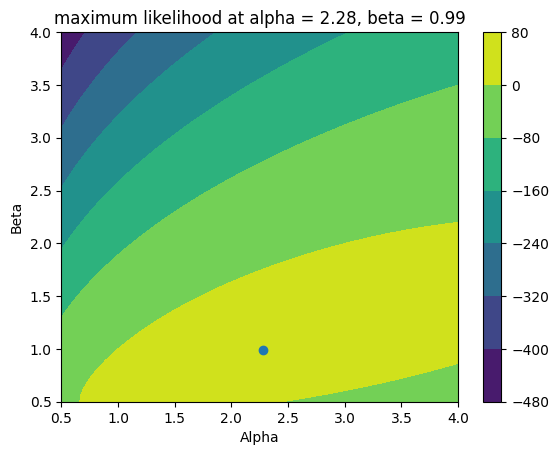

In [13]:
alpha_values = np.linspace(0.5, 4, 100)
beta_values = np.linspace(0.5, 4, 100)
Lmap =np.array([[beta_log(alpha, beta) for alpha in alpha_values] for beta in beta_values])

fig, ax = plt.subplots()
im = ax.contourf(alpha_values, beta_values, Lmap)
mle_alpha = beta_mle()[0]
mle_beta = beta_mle()[1]
ax.scatter(mle_alpha,mle_beta)
cbar = ax.figure.colorbar(im, ax=ax)

ax.set_xlabel("Alpha"); ax.set_ylabel("Beta")
ax.set_title(f"maximum likelihood at alpha = {mle_alpha:.2f}, beta = {mle_beta:.2f}");


**Response to part C**
To do this we're just going to use the cdf function. After using the function we would estimate that about 2.5% of forest tracts have less than 20% of their trees burned. 

**Code for part C**

In [14]:
proportion = beta.cdf(.2, mle_alpha,mle_beta)
proportion

0.02518616595182752

# 3. Statistics statistics

We have given 25 statistics students
a standardized test on statistics concepts
both before and after taking a statistics class.
Across the class, the mean improvement was 32 points (out of 100),
with an SD of 30 points.
Assuming that the $t$ test is appropriate,
what can we conclude from this study?
Please interpret the results, including degree of uncertainty.

**Response**

Given these pieces of information, we can calculate the test statistic by dividing the sample mean by (standard deviation of sample/ square root of n).
This value is 5.3 (see following code below). With a test statistic of 5.3, and 24 degrees of freedom, we find a p_value of .000000895. To interpret this in human words, given our null hypothesis of no improvement, there is a .0000895% chance that we would find a mean improvement of 32 by chance alone. This means that it's extremely likely that this statistics class was successful at increasing our statistics test scores. 

**Code for this Part Below**

In [15]:
n = 25-1
standard_dev_sample = 30
mean_improvement = 32
test_statistic = mean_improvement/(standard_dev_sample/math.sqrt(n))
test_statistic

5.225578117937446

In [16]:
from scipy.stats import t

In [17]:
p_value = 1-t.cdf(test_statistic, n-1)
p_value

1.3351781828374598e-05